In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r'/Users/chimuanyaazike/Desktop/Churn/Churn/DataCleaning/encoded_data.csv')

In [4]:
data

,CustomerID,Age,Location,Segment,NPS,ChurnLabel,TotalPurchaseFrequency,TotalPurchaseValue,ProductList,Plan,numEmails,numCalls,numChats,AVGLatePayment,NumPaymentMethods,PageViews,TimeSpent(minutes),ActionCount,unique_pages,Logins,Rating,AVGOpenDays,AVGClickDays,customer_segment,Start_Date_year,Start_Date_month,Start_Date_day,End_Date_year,End_Date_month,End_Date_day,FirstInteractionDate_year,FirstInteractionDate_month,FirstInteractionDate_day,LastInteractionDate_year,LastInteractionDate_month,LastInteractionDate_day,churndate_year,churndate_month,churndate_day,most_recent_action_date_only_year,most_recent_action_date_only_month,most_recent_action_date_only_day,Gender_Female,Gender_Male,TotalInteractionType_Call,TotalInteractionType_Call|Chat,TotalInteractionType_Call|Chat|Email,TotalInteractionType_Call|Email,TotalInteractionType_Chat,TotalInteractionType_Chat|Email,TotalInteractionType_Email,Frequency_Daily,Frequency_Monthly,Frequency_Weekly
0,1001,31,3155.595000,1.0,3,1,38,3994.72,3994.720000,6.0,1,1,2,13.333333,3,49,15,24,13,19,1,818.0,319.0,3.0,2020,6,8,2022,10,27,2019,9,26,2021,7,25,2020,1,27,2022,11,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1002,66,1477.077500,2.0,6,0,4,2844.35,2844.350000,12.0,10,5,4,3.333333,3,100,9,24,13,9,2,110.0,88.0,3.0,2021,7,21,2022,5,7,2019,1,12,2022,12,13,2019,1,6,2022,12,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1003,36,1866.520000,1.0,3,0,14,1866.52,1866.520000,5.0,1,1,1,2.666667,3,1,97,12,7,19,4,333.0,117.0,0.0,2019,10,5,2020,8,19,2019,10,9,2022,1,4,2019,4,30,2022,11,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1004,62,2473.600000,2.0,1,1,28,1378.64,1378.640000,15.0,18,17,24,26.333333,3,25,31,47,14,4,1,159.0,423.0,3.0,2020,1,14,2022,3,27,2019,1,3,2022,11,10,2020,3,3,2022,12,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1005,68,3795.523750,2.0,3,0,39,2425.05,2425.050000,0.0,5,4,1,0.666667,3,77,51,30,12,12,3,193.0,96.0,2.0,2021,4,8,2022,11,9,2019,4,10,2022,12,19,2019,4,5,2022,12,30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,13479,55,1196.560000,0.0,8,0,14,1196.56,1196.560000,5.0,3,3,4,1.000000,3,70,57,6,6,22,2,126.0,443.0,3.0,2019,6,15,2021,6,29,2019,5,7,2022,10,9,2022,1,27,2022,10,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12479,13480,29,710.570000,0.0,7,0,1,710.57,523.136667,8.0,0,1,2,2.000000,3,71,66,9,8,25,3,167.0,40.0,0.0,2022,12,10,2022,12,28,2019,12,11,2022,11,5,2020,6,14,2022,11,10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12480,13481,38,5154.420000,2.0,1,1,63,5154.42,5154.420000,2.0,11,9,6,27.666667,3,96,1,26,9,9,5,383.0,459.0,1.0,2021,7,4,2021,7,24,2019,1,12,2022,12,8,2020,10,13,2022,11,20,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12481,13482,26,3856.435000,0.0,0,0,58,6055.16,6055.160000,9.0,4,3,6,22.333333,3,63,2,38,12,2,5,435.0,15.0,2.0,2020,7,21,2021,11,17,2019,4,5,2022,11,15,2020,6,24,2022,9,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
X = data.drop(columns=['ChurnLabel'])
y = data['ChurnLabel']

In [6]:
X

,CustomerID,Age,Location,Segment,NPS,TotalPurchaseFrequency,TotalPurchaseValue,ProductList,Plan,numEmails,numCalls,numChats,AVGLatePayment,NumPaymentMethods,PageViews,TimeSpent(minutes),ActionCount,unique_pages,Logins,Rating,AVGOpenDays,AVGClickDays,customer_segment,Start_Date_year,Start_Date_month,Start_Date_day,End_Date_year,End_Date_month,End_Date_day,FirstInteractionDate_year,FirstInteractionDate_month,FirstInteractionDate_day,LastInteractionDate_year,LastInteractionDate_month,LastInteractionDate_day,churndate_year,churndate_month,churndate_day,most_recent_action_date_only_year,most_recent_action_date_only_month,most_recent_action_date_only_day,Gender_Female,Gender_Male,TotalInteractionType_Call,TotalInteractionType_Call|Chat,TotalInteractionType_Call|Chat|Email,TotalInteractionType_Call|Email,TotalInteractionType_Chat,TotalInteractionType_Chat|Email,TotalInteractionType_Email,Frequency_Daily,Frequency_Monthly,Frequency_Weekly
0,1001,31,3155.595000,1.0,3,38,3994.72,3994.720000,6.0,1,1,2,13.333333,3,49,15,24,13,19,1,818.0,319.0,3.0,2020,6,8,2022,10,27,2019,9,26,2021,7,25,2020,1,27,2022,11,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1002,66,1477.077500,2.0,6,4,2844.35,2844.350000,12.0,10,5,4,3.333333,3,100,9,24,13,9,2,110.0,88.0,3.0,2021,7,21,2022,5,7,2019,1,12,2022,12,13,2019,1,6,2022,12,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1003,36,1866.520000,1.0,3,14,1866.52,1866.520000,5.0,1,1,1,2.666667,3,1,97,12,7,19,4,333.0,117.0,0.0,2019,10,5,2020,8,19,2019,10,9,2022,1,4,2019,4,30,2022,11,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1004,62,2473.600000,2.0,1,28,1378.64,1378.640000,15.0,18,17,24,26.333333,3,25,31,47,14,4,1,159.0,423.0,3.0,2020,1,14,2022,3,27,2019,1,3,2022,11,10,2020,3,3,2022,12,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1005,68,3795.523750,2.0,3,39,2425.05,2425.050000,0.0,5,4,1,0.666667,3,77,51,30,12,12,3,193.0,96.0,2.0,2021,4,8,2022,11,9,2019,4,10,2022,12,19,2019,4,5,2022,12,30,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,13479,55,1196.560000,0.0,8,14,1196.56,1196.560000,5.0,3,3,4,1.000000,3,70,57,6,6,22,2,126.0,443.0,3.0,2019,6,15,2021,6,29,2019,5,7,2022,10,9,2022,1,27,2022,10,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12479,13480,29,710.570000,0.0,7,1,710.57,523.136667,8.0,0,1,2,2.000000,3,71,66,9,8,25,3,167.0,40.0,0.0,2022,12,10,2022,12,28,2019,12,11,2022,11,5,2020,6,14,2022,11,10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12480,13481,38,5154.420000,2.0,1,63,5154.42,5154.420000,2.0,11,9,6,27.666667,3,96,1,26,9,9,5,383.0,459.0,1.0,2021,7,4,2021,7,24,2019,1,12,2022,12,8,2020,10,13,2022,11,20,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12481,13482,26,3856.435000,0.0,0,58,6055.16,6055.160000,9.0,4,3,6,22.333333,3,63,2,38,12,2,5,435.0,15.0,2.0,2020,7,21,2021,11,17,2019,4,5,2022,11,15,2020,6,24,2022,9,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
y

0        1
1        0
2        0
3        1
4        0
        ..
12478    0
12479    0
12480    1
12481    0
12482    1
Name: ChurnLabel, Length: 12483, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}") # 80% training and 20% test



Training set size: (9986, 53), Test set size: (2497, 53)


### Training Base Model

In [9]:
model = LogisticRegression(penalty = 'l2',
                           random_state= 42,
                           n_jobs=1,
                           solver = 'sag',
                           max_iter=200
                           )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score = accuracy_score(y_pred, y_test)

In [10]:
round(acc_score*100, 2)

90.03

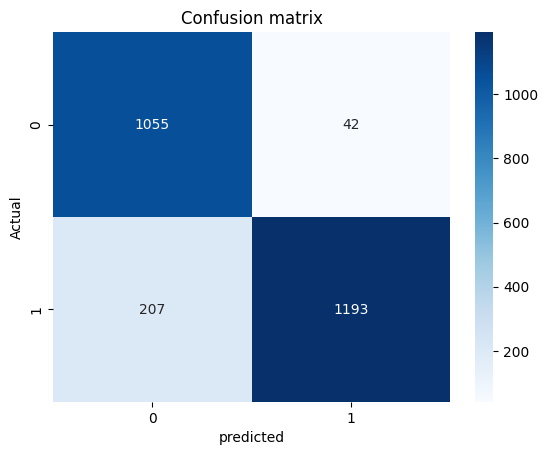

In [11]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, cmap='Blues', fmt='d')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('predicted')
plt.show()

In [12]:
{
    "precision_score": precision_score(y_pred, y_test),
    "recall_score": recall_score(y_pred, y_test),
    "f1_score": f1_score(y_test, y_pred)
}

{'precision_score': 0.965991902834008,
 'recall_score': 0.8521428571428571,
 'f1_score': 0.9055028462998103}

In [14]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1262
           1       0.85      0.97      0.91      1235

    accuracy                           0.90      2497
   macro avg       0.91      0.90      0.90      2497
weighted avg       0.91      0.90      0.90      2497



### Running Some Optimization

#### Hyperparameter tuning

In [15]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "penalty" : ['l2', 'l1'],
    "solver": ['saga', 'sag'],
    "max_iter": [100, 200]
}

model = LogisticRegression(random_state=42, n_jobs=1)

random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv = 4,
                                   random_state=42)

random_search.fit(X, y)
best_param = random_search.best_params_
best_model = random_search.best_estimator_

print(best_param)
print(best_model)

{'solver': 'sag', 'penalty': 'l2', 'max_iter': 200}
LogisticRegression(max_iter=200, n_jobs=1, random_state=42, solver='sag')


In [18]:
y_pred = best_model.predict(X_test)
round(accuracy_score(y_pred, y_test), 2)*100

91.0

In [19]:
from sklearn.tree import DecisionTreeClassifier

def train_and_evaluate_DT(X: pd.DataFrame, y: pd.Series) -> dict:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    model = DecisionTreeClassifier(random_state=42)
    
    param_dist = {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ['best', 'random'],
        "max_depth": [100, 200, 300],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]
    }
    
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=4, random_state=42, n_jobs=1)
    
    random_search.fit(X_train, y_train)
    best_param = random_search.best_params_
    best_model = random_search.best_estimator_
    
    print(best_param)
    
    y_pred = best_model.predict(X_test)
    
    eval_metrics = {
        "accuracy_score": round(accuracy_score(y_pred, y_test) * 100, 2),
        "precision": precision_score(y_pred, y_test),
        "recall": recall_score(y_pred, y_test),
        "f1_score": f1_score(y_pred, y_test),
        "confusion_matrix": confusion_matrix(y_pred, y_test)
    }
    
    return eval_metrics

In [22]:
train_and_evaluate_DT(X, y)

{'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 300, 'criterion': 'gini'}


{'accuracy_score': 95.8,
 'precision': 0.9516129032258065,
 'recall': 0.9634225996080993,
 'f1_score': 0.9574813372281726,
 'confusion_matrix': array([[1515,   75],
        [  56, 1475]])}

In [23]:
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)